In [1]:
# pip install pandas

In [2]:
import pandas as pd

In [3]:
#data used From P2P site LendingClub
df= pd.read_csv(r"E:\lendingclub\lending_club_loan_two.csv", nrows=2000)

In [4]:
#removing unit - months from term column 
df['term'] = df['term'].str.replace('months', '')
df['term'] = df['term'].astype(int)

In [5]:
df.head(3)

loan_amnt  term  int_rate  installment grade sub_grade        emp_title  \
0    10000.0    36     11.44       329.48     B        B4        Marketing   
1     8000.0    36     11.99       265.68     B        B5  Credit analyst    
2    15600.0    36     10.49       506.97     B        B3     Statistician   

  emp_length home_ownership  annual_inc  ... open_acc pub_rec revol_bal  \
0  10+ years           RENT    117000.0  ...     16.0     0.0   36369.0   
1    4 years       MORTGAGE     65000.0  ...     17.0     0.0   20131.0   
2   < 1 year           RENT     43057.0  ...     13.0     0.0   11987.0   

  revol_util total_acc  initial_list_status application_type  mort_acc  \
0       41.8      25.0                    w       INDIVIDUAL       0.0   
1       53.3      27.0                    f       INDIVIDUAL       3.0   
2       92.2      26.0                    f       INDIVIDUAL       0.0   

   pub_rec_bankruptcies                                            address  
0                   0.0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1                   0.0  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2                   0.0  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  

[3 rows x 27 columns]

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
#dropping all records having any Null values in its rows
df = df.dropna(how='any',axis=0) 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             1728 non-null   float64
 1   term                  1728 non-null   int32  
 2   int_rate              1728 non-null   float64
 3   installment           1728 non-null   float64
 4   grade                 1728 non-null   object 
 5   sub_grade             1728 non-null   object 
 6   emp_title             1728 non-null   object 
 7   emp_length            1728 non-null   object 
 8   home_ownership        1728 non-null   object 
 9   annual_inc            1728 non-null   float64
 10  verification_status   1728 non-null   object 
 11  issue_d               1728 non-null   object 
 12  loan_status           1728 non-null   object 
 13  purpose               1728 non-null   object 
 14  title                 1728 non-null   object 
 15  dti                  

In [9]:
#chcking if data has 10 years or is it so ,
#all exact 10 years have been considered 10+ years in general. 
df.loc[df['emp_length'] == '10 years']

Empty DataFrame
Columns: [loan_amnt, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, dti, earliest_cr_line, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, application_type, mort_acc, pub_rec_bankruptcies, address]
Index: []

[0 rows x 27 columns]

In [10]:
#no rows indicate our assumption of exact 10 years as 10+ years holds true.

In [11]:
#data cleaning

df_with_plus_removed= df['emp_length'].str.split("+").str[0]


In [12]:
df_with_years_removed = df_with_plus_removed.str.replace('years', '')

In [13]:
df_with_years_removed.head(5)

0          10
1          4 
2    < 1 year
3          6 
4          9 
Name: emp_length, dtype: object

In [14]:

replace_values = {'1 year':1, '< 1 year':0.6}
df['emp_length']=df_with_years_removed.replace(replace_values)

In [15]:
pd.options.mode.chained_assignment = None 
#avoids warning caused by using inplace = True

In [16]:
df.application_type.replace(to_replace=dict(INDIVIDUAL=1, JOINT=0), inplace=True)

In [17]:
pd.set_option("display.max_columns", None)

In [18]:
df.initial_list_status.replace(to_replace=dict(w=1, f=0), inplace=True)

In [19]:
# pd.unique(df[['Col1', 'Col2']].values.ravel('K')) for 2 colums' unique values
pd.unique(df[['home_ownership']].values.ravel('K'))

array(['RENT', 'MORTGAGE', 'OWN'], dtype=object)

In [20]:
df.home_ownership.replace(to_replace=dict(OWN=1, RENT=0,MORTGAGE=3), inplace=True)

In [21]:
pd.unique(df[['verification_status']].values.ravel('K'))

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [22]:
mapping = {'Not Verified': 0, 'Verified': 1,'Source Verified' : 2}
#avoid inplace
df=df.replace({'verification_status': mapping})

In [23]:
pd.unique(df[['grade']].values.ravel('K'))

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [24]:
grade_mapping = {'A': 1, 'B': 2,'C' : 3,'D': 4, 'E': 5,'F' : 6,'G' : 7}
df=df.replace({'grade': grade_mapping})

In [25]:
pd.unique(df[['loan_status']].values.ravel('K'))

array(['Fully Paid', 'Charged Off'], dtype=object)

In [26]:
loan_status_mapping = {'Fully Paid': 1, 'Charged Off': 2}
df=df.replace({'loan_status': loan_status_mapping})

In [27]:
df = df.drop('grade', axis=1)

In [28]:
df = df.drop('sub_grade', axis=1)

In [29]:
df = df.drop('title', axis=1)

In [30]:
df = df.drop('open_acc', axis=1)

In [31]:
df = df.drop('mort_acc', axis=1)

In [32]:
df = df.drop('revol_util', axis=1)

In [33]:
unique_strings=pd.unique(df[['emp_title']].values.ravel('K'))

In [34]:
unique_strings

array(['Marketing', 'Credit analyst ', 'Statistician', ..., 'CRNA',
       'Assistant Department Manager', 'NY State Insurance Fund'],
      dtype=object)

In [35]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(unique_strings)))])

In [36]:
#one hot encoded columns
emp_title_one_hot_columns = pd.get_dummies(df.emp_title, prefix='emp_title')
print(emp_title_one_hot_columns.head(5))

   emp_title_3V Dairy  emp_title_3rd Grade Teacher  emp_title_5  \
0                   0                            0            0   
1                   0                            0            0   
2                   0                            0            0   
3                   0                            0            0   
4                   0                            0            0   

   emp_title_A/P  emp_title_ACM LLC  emp_title_ADMIN  emp_title_ADP  \
0              0                  0                0              0   
1              0                  0                0              0   
2              0                  0                0              0   
3              0                  0                0              0   
4              0                  0                0              0   

   emp_title_AE  emp_title_ALEXANDER OILFIELD SERVICE  \
0             0                                     0   
1             0                                     0   

In [37]:
#one hot encoding led to sparse matrix so now what ?????
#https://stats.stackexchange.com/questions/325263/binary-encoding-vs-one-hot-encoding

In [38]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['loan_status'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('loan_status', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [39]:
features

array([[10000.0, 36, 11.44, ..., 1, 0.0,
        '0174 Michelle Gateway\r\nMendozaberg, OK 22690'],
       [8000.0, 36, 11.99, ..., 1, 0.0,
        '1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113'],
       [15600.0, 36, 10.49, ..., 1, 0.0,
        '87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113'],
       ...,
       [25000.0, 36, 6.03, ..., 1, 0.0,
        '309 Jennifer Knolls\r\nBrandonborough, FL 00813'],
       [8000.0, 36, 8.18, ..., 1, 0.0,
        '07629 Nicholas Mission\r\nVancebury, LA 48052'],
       [14000.0, 36, 6.62, ..., 1, 0.0,
        '671 Destiny Cove Suite 154\r\nMelissabury, OH 48052']],
      dtype=object)

<h2>Why Random Forest not used</h2>
label encoding bad when not of order also random forest cant be used since our one hot encoding too big , and label encoding bad cause not in order ie are discontinuous/discrete numeric values.
<a>https://datascience.stackexchange.com/questions/5226/strings-as-features-in-decision-tree-random-forest</a>

In [40]:
issue_d_split= pd.DataFrame(df.issue_d.str.split('-',1).tolist(),
                                 columns = ['issue_d_month','issue_d_year'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_15012\3322543989.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  issue_d_split= pd.DataFrame(df.issue_d.str.split('-',1).tolist(),


In [41]:
# df=df.join(issue_d_split)

In [42]:
# df[['issue_d_month','issue_d_year','issue_d']]
# #the random indexing in issue_d cause problem in serial indexing of issue_d_month and year
# df.drop('issue_d_year', axis=1)
# df.drop('issue_d_month', axis=1)


In [43]:
issue_d_split.reset_index(drop=True, inplace=True)


In [44]:
issue_d_split.index

RangeIndex(start=0, stop=1728, step=1)

In [45]:
issue_d_split.set_index(df.index,inplace=True)

In [46]:
issue_d_split.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999],
           dtype='int64', length=1728)

In [47]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999],
           dtype='int64', length=1728)

In [48]:
print(issue_d_split.index == df.index)

[ True  True  True ...  True  True  True]


In [49]:
test=df.join(issue_d_split)

In [50]:
test.shape

(1728, 23)

In [51]:
df=test

In [52]:
earliest_cr_line_split= pd.DataFrame(df.earliest_cr_line.str.split('-',1).tolist(),
                                 columns = ['earliest_cr_line_month','earliest_cr_line_year'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_15012\2828959612.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  earliest_cr_line_split= pd.DataFrame(df.earliest_cr_line.str.split('-',1).tolist(),


In [53]:
earliest_cr_line_split.set_index(df.index,inplace=True)

In [54]:
test2=df.join(earliest_cr_line_split)

In [55]:
print(test2['earliest_cr_line'] == test2['earliest_cr_line_month']+"-"+test2['earliest_cr_line_year'])

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
23      True
24      True
26      True
27      True
28      True
29      True
30      True
31      True
33      True
34      True
37      True
38      True
39      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
59      True
60      True
61      True
63      True
64      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True
77      True
79      True
80      True
81      True
82      True
83      True
84      True
85      True
86      True
87      True
89      True

In [56]:
test2.drop('earliest_cr_line', axis=1)

loan_amnt  term  int_rate  installment  \
0       10000.0    36     11.44       329.48   
1        8000.0    36     11.99       265.68   
2       15600.0    36     10.49       506.97   
3        7200.0    36      6.49       220.65   
4       24375.0    60     17.27       609.33   
5       20000.0    36     13.33       677.07   
6       18000.0    36      5.32       542.07   
7       13000.0    36     11.14       426.47   
8       18900.0    60     10.99       410.84   
9       26300.0    36     16.29       928.40   
10      10000.0    36     13.11       337.47   
11      35000.0    36     14.64      1207.13   
12       7500.0    36      9.17       239.10   
13      35000.0    60     12.29       783.70   
14      25975.0    36      6.62       797.53   
15      18000.0    36      8.39       567.30   
16      32350.0    60     21.98       893.11   
17      11200.0    60     12.29       250.79   
18      34000.0    36      7.90      1063.87   
19      20000.0    36      6.97       617.27   
20       9200.0    36      6.62       282.48   
21       7350.0    36     13.11       248.05   
23      20000.0    36      8.39       630.34   
24       5000.0    36     15.61       174.83   
26       8400.0    36     13.35       284.45   
27      23050.0    36     12.12       766.92   
28      15000.0    36      9.99       483.94   
29      20000.0    36      8.19       628.49   
30      13200.0    36     18.75       482.20   
31       4600.0    36     12.29       153.43   
33      20000.0    36     12.29       667.06   
34      12725.0    36     14.99       441.06   
37      15000.0    36     13.67       510.27   
38      15000.0    36     13.35       507.95   
39      10800.0    36     13.98       369.02   
42      21000.0    60     17.86       531.67   
43       8400.0    36     12.12       279.49   
44      11950.0    60     16.29       292.45   
45       6700.0    36     21.49       254.12   
46      16000.0    36     12.99       539.03   
47      20000.0    36     13.67       680.36   
48      16000.0    60     18.54       411.01   
50      12875.0    36     17.10       459.67   
51      15000.0    60     18.25       382.95   
52       8000.0    36     11.67       264.46   
53      14000.0    36      6.24       427.44   
54      12000.0    60      8.18       244.36   
55      15000.0    36     13.98       512.52   
56      12000.0    36     12.35       400.59   
57      35000.0    36     14.16      1198.94   
59      15000.0    60     18.55       385.41   
60       9000.0    36     12.35       300.44   
61      25000.0    60     22.15       692.61   
63      20000.0    36      7.90       625.81   
64      10000.0    60     15.99       243.13   
66      15975.0    60     24.99       468.80   
67      12000.0    60     14.99       285.42   
68       9900.0    36      9.67       317.92   
69       3350.0    36     15.61       117.14   
70      17000.0    60     19.19       442.77   
71       6425.0    36      8.39       202.50   
72       7200.0    36     21.00       271.27   
73       7475.0    36     12.69       250.75   
74      10000.0    36     13.98       341.68   
75      13200.0    36     10.74       430.53   
76      19000.0    36      6.68       583.89   
77      11250.0    60     19.22       293.20   
79      33000.0    60     17.27       824.94   
80      19000.0    36     12.12       632.17   
81      10000.0    36     16.99       356.48   
82       8050.0    36     16.55       285.21   
83       9000.0    36     15.61       314.69   
84       7200.0    36     19.97       267.47   
85       5600.0    36      7.89       175.20   
86      10000.0    36     18.25       362.78   
87      30000.0    60     24.70       875.28   
89      23000.0    36      8.39       724.89   
90      18000.0    36     10.99       589.22   
93       5000.0    36     10.99       163.67   
94       4000.0    36     13.33       135.42   
95      30000.0    36     16.49      1061.99   
96      12625.0    60     25.78       376.36   
97      13400.0    60 

In [57]:
df=test2

In [58]:
df.emp_title = df.emp_title.str.strip()

In [59]:
df['emp_title']=df['emp_title'].replace(' ', '_', regex=True)

<p>all space removal data cleaning</p>
<a>https://stackoverflow.com/questions/41476150/removing-space-from-columns-in-pandas</a>

In [60]:
df['emp_title'] = df['emp_title'].str.lower() 

In [61]:
df=df.drop('earliest_cr_line', axis=1)

In [62]:
df=df.drop('issue_d',axis=1)

In [63]:
df.purpose = df.purpose.str.strip()

In [64]:
X = df.drop(columns=["loan_status"])

In [65]:
y = df['loan_status']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [68]:
len(pd.unique(df[['emp_title']].values.ravel('K')))

1330

In [69]:
pd.unique(df[['emp_title']].values.ravel('K'))

array(['marketing', 'credit_analyst', 'statistician', ..., 'crna',
       'assistant_department_manager', 'ny_state_insurance_fund'],
      dtype=object)

In [70]:
category_columns=['emp_title','purpose']
df_mapped=pd.DataFrame({col: df[col].astype('category').cat.codes for col in category_columns}, index=df.index)

In [71]:
throwaway=df

In [72]:
throwaway['emp_title'] = throwaway.emp_title.astype('category')

In [73]:
throwaway['purpose'] = throwaway.purpose.astype('category')

In [74]:
emp_title_mappings = dict( enumerate(throwaway['emp_title'].cat.categories ) )

In [75]:
len(emp_title_mappings)

1330

In [76]:
len(pd.unique(throwaway['emp_title'].values.ravel('K')))

1330

In [77]:
#both 707 meaning mapping done right as 707 unique data
len(throwaway['emp_title'])

1728

In [78]:
inv_emp_title_mappings = {v: k for k, v in emp_title_mappings.items()}

In [79]:
df=df.replace({'emp_title': inv_emp_title_mappings })

In [80]:
pd.unique(df[['earliest_cr_line_month']].values.ravel('K'))

array(['Jun', 'Jul', 'Aug', 'Sep', 'Mar', 'Jan', 'Dec', 'May', 'Apr',
       'Oct', 'Feb', 'Nov'], dtype=object)

In [81]:
months_mapping = {'Jan': 1, 'Feb': 2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,
                  'Nov':11,'Dec':12}
df=df.replace({'earliest_cr_line_month': months_mapping})

In [82]:
pd.unique(df[['issue_d_month']].values.ravel('K'))

array(['Jan', 'Nov', 'Apr', 'Sep', 'Oct', 'Jun', 'May', 'Dec', 'Jul',
       'Feb', 'Mar', 'Aug'], dtype=object)

In [83]:
df=df.replace({'issue_d_month': months_mapping})

In [84]:
purpose_mappings = dict( enumerate(df['purpose'].cat.categories ) )

In [85]:
purpose_mappings

{0: 'car',
 1: 'credit_card',
 2: 'debt_consolidation',
 3: 'home_improvement',
 4: 'house',
 5: 'major_purchase',
 6: 'medical',
 7: 'moving',
 8: 'other',
 9: 'small_business',
 10: 'vacation',
 11: 'wedding'}

In [86]:
inv_purpose_mappings = {v: k for k, v in purpose_mappings.items()}

In [87]:
inv_purpose_mappings


{'car': 0,
 'credit_card': 1,
 'debt_consolidation': 2,
 'home_improvement': 3,
 'house': 4,
 'major_purchase': 5,
 'medical': 6,
 'moving': 7,
 'other': 8,
 'small_business': 9,
 'vacation': 10,
 'wedding': 11}

In [88]:
len(pd.unique(df[['purpose']].values.ravel('K')))

12

In [89]:
#hence mapping length = actual unique so mapping done right


In [90]:
df=df.replace({'purpose': inv_purpose_mappings})

In [91]:
address_as_category = df.address.astype('category')

In [92]:
df['address']=address_as_category

In [93]:
address_mappings = dict( enumerate(df['address'].cat.categories ) )

In [94]:
inv_address_mappings= {v: k for k, v in address_mappings.items()}

In [95]:
len(inv_address_mappings)

1728

In [96]:
df=df.replace({'address': inv_address_mappings})

In [97]:
df.head(1)

loan_amnt  term  int_rate  installment emp_title emp_length  \
0    10000.0    36     11.44       329.48       699         10   

   home_ownership  annual_inc  verification_status  loan_status purpose  \
0               0    117000.0                    0            1      10   

     dti  pub_rec  revol_bal  total_acc  initial_list_status  \
0  26.24      0.0    36369.0       25.0                    1   

   application_type  pub_rec_bankruptcies address  issue_d_month issue_d_year  \
0                 1                   0.0      32              1         2015   

   earliest_cr_line_month earliest_cr_line_year  
0                       6                  1990

In [98]:
X = df.drop(columns=["loan_status"])

In [99]:
y = df['loan_status']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [101]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [102]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_prediction = model.predict(X_test)

In [104]:
print(y_prediction)

[1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2
 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 2 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1
 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 2 2 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 2 1 2 1 1 2 1 1 2 1 1 2 1 2 1 1 2 1
 2 1 2 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1 1 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 2 1 1 1 

In [105]:
from sklearn.metrics import accuracy_score
prediction_accuracy = accuracy_score(y_test, y_prediction)

In [106]:
prediction_accuracy 

0.6925619834710743

In [107]:
df.shape

(1728, 23)

In [108]:
df.iloc[[2]].drop(columns=["loan_status"]) 
y_prediction = model.predict(df.iloc[[2]].drop(columns=["loan_status"]))

In [109]:
print(y_prediction)

[1]


In [110]:
df.iloc[[2]]

loan_amnt  term  int_rate  installment emp_title emp_length  \
2    15600.0    36     10.49       506.97      1139        0.6   

   home_ownership  annual_inc  verification_status  loan_status purpose  \
2               0     43057.0                    2            1       1   

     dti  pub_rec  revol_bal  total_acc  initial_list_status  \
2  12.79      0.0    11987.0       26.0                    0   

   application_type  pub_rec_bankruptcies address  issue_d_month issue_d_year  \
2                 1                   0.0    1334              1         2015   

   earliest_cr_line_month earliest_cr_line_year  
2                       8                  2007

In [111]:
df.iloc[[4]]

loan_amnt  term  int_rate  installment emp_title emp_length  \
4    24375.0    60     17.27       609.33       341         9    

   home_ownership  annual_inc  verification_status  loan_status purpose  \
4               3     55000.0                    1            2       1   

     dti  pub_rec  revol_bal  total_acc  initial_list_status  \
4  33.95      0.0    24584.0       43.0                    0   

   application_type  pub_rec_bankruptcies address  issue_d_month issue_d_year  \
4                 1                   0.0    1049              4         2013   

   earliest_cr_line_month earliest_cr_line_year  
4                       3                  1999

In [112]:
print((df[df['loan_status'] == 2]).index) #those with loan status 2 for testing

Int64Index([   4,   26,   48,   54,   69,   72,   81,   82,   84,   97,
            ...
            1938, 1942, 1943, 1945, 1963, 1978, 1979, 1985, 1986, 1994],
           dtype='int64', length=329)


In [113]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999],
           dtype='int64', length=1728)

In [114]:
row_index=97
for i in df.index :
    row=df.loc[[i]]
    row_actual_loan_status= row.iloc[0]['loan_status']
    prediction=model.predict(row.drop(columns=["loan_status"]))
    if(prediction)== 2:
        print("The index that model predicted as loan_status as 2 = ",i)
        print("Correctly Predicted") if (row_actual_loan_status == prediction) else print("Wrongly Predicted")
       

The index that model predicted as loan_status as 2 =  4
Correctly Predicted
The index that model predicted as loan_status as 2 =  9
Wrongly Predicted
The index that model predicted as loan_status as 2 =  13
Wrongly Predicted
The index that model predicted as loan_status as 2 =  26
Correctly Predicted
The index that model predicted as loan_status as 2 =  27
Wrongly Predicted
The index that model predicted as loan_status as 2 =  48
Correctly Predicted
The index that model predicted as loan_status as 2 =  51
Wrongly Predicted
The index that model predicted as loan_status as 2 =  54
Correctly Predicted
The index that model predicted as loan_status as 2 =  57
Wrongly Predicted
The index that model predicted as loan_status as 2 =  69
Correctly Predicted
The index that model predicted as loan_status as 2 =  70
Wrongly Predicted
The index that model predicted as loan_status as 2 =  79
Wrongly Predicted
The index that model predicted as loan_status as 2 =  81
Correctly Predicted
The index that 

The index that model predicted as loan_status as 2 =  730
Correctly Predicted
The index that model predicted as loan_status as 2 =  734
Correctly Predicted
The index that model predicted as loan_status as 2 =  738
Correctly Predicted
The index that model predicted as loan_status as 2 =  747
Correctly Predicted
The index that model predicted as loan_status as 2 =  748
Correctly Predicted
The index that model predicted as loan_status as 2 =  761
Correctly Predicted
The index that model predicted as loan_status as 2 =  771
Wrongly Predicted
The index that model predicted as loan_status as 2 =  779
Correctly Predicted
The index that model predicted as loan_status as 2 =  784
Correctly Predicted
The index that model predicted as loan_status as 2 =  785
Correctly Predicted
The index that model predicted as loan_status as 2 =  787
Correctly Predicted
The index that model predicted as loan_status as 2 =  791
Correctly Predicted
The index that model predicted as loan_status as 2 =  795
Wrongly 

The index that model predicted as loan_status as 2 =  1349
Correctly Predicted
The index that model predicted as loan_status as 2 =  1353
Correctly Predicted
The index that model predicted as loan_status as 2 =  1354
Correctly Predicted
The index that model predicted as loan_status as 2 =  1356
Correctly Predicted
The index that model predicted as loan_status as 2 =  1358
Wrongly Predicted
The index that model predicted as loan_status as 2 =  1361
Correctly Predicted
The index that model predicted as loan_status as 2 =  1370
Correctly Predicted
The index that model predicted as loan_status as 2 =  1382
Correctly Predicted
The index that model predicted as loan_status as 2 =  1387
Wrongly Predicted
The index that model predicted as loan_status as 2 =  1388
Correctly Predicted
The index that model predicted as loan_status as 2 =  1393
Correctly Predicted
The index that model predicted as loan_status as 2 =  1399
Correctly Predicted
The index that model predicted as loan_status as 2 =  14

In [115]:
for i in df.index :
    row=df.loc[[i]]
    row_actual_loan_status= row.iloc[0]['loan_status']
    prediction=model.predict(row.drop(columns=["loan_status"]))
    if(prediction)!= row_actual_loan_status:
        print("The index that model predicted wrong = ",i,"with its actual being",row_actual_loan_status,"while predicted",prediction)
    else:
        print("The data index at",i,"was predicted = ",prediction,"which is equal to its actual =",row_actual_loan_status)

The data index at 0 was predicted =  [1] which is equal to its actual = 1
The data index at 1 was predicted =  [1] which is equal to its actual = 1
The data index at 2 was predicted =  [1] which is equal to its actual = 1
The data index at 3 was predicted =  [1] which is equal to its actual = 1
The data index at 4 was predicted =  [2] which is equal to its actual = 2
The data index at 5 was predicted =  [1] which is equal to its actual = 1
The data index at 6 was predicted =  [1] which is equal to its actual = 1
The data index at 7 was predicted =  [1] which is equal to its actual = 1
The data index at 8 was predicted =  [1] which is equal to its actual = 1
The index that model predicted wrong =  9 with its actual being 1 while predicted [2]
The data index at 10 was predicted =  [1] which is equal to its actual = 1
The data index at 11 was predicted =  [1] which is equal to its actual = 1
The data index at 12 was predicted =  [1] which is equal to its actual = 1
The index that model pr

The data index at 134 was predicted =  [1] which is equal to its actual = 1
The data index at 135 was predicted =  [1] which is equal to its actual = 1
The data index at 136 was predicted =  [1] which is equal to its actual = 1
The data index at 137 was predicted =  [1] which is equal to its actual = 1
The data index at 138 was predicted =  [1] which is equal to its actual = 1
The data index at 140 was predicted =  [1] which is equal to its actual = 1
The data index at 141 was predicted =  [1] which is equal to its actual = 1
The data index at 142 was predicted =  [1] which is equal to its actual = 1
The data index at 144 was predicted =  [2] which is equal to its actual = 2
The index that model predicted wrong =  145 with its actual being 2 while predicted [1]
The data index at 146 was predicted =  [1] which is equal to its actual = 1
The data index at 147 was predicted =  [1] which is equal to its actual = 1
The data index at 148 was predicted =  [1] which is equal to its actual = 1


The data index at 284 was predicted =  [1] which is equal to its actual = 1
The data index at 285 was predicted =  [1] which is equal to its actual = 1
The data index at 286 was predicted =  [1] which is equal to its actual = 1
The data index at 287 was predicted =  [1] which is equal to its actual = 1
The data index at 288 was predicted =  [1] which is equal to its actual = 1
The data index at 290 was predicted =  [1] which is equal to its actual = 1
The data index at 291 was predicted =  [1] which is equal to its actual = 1
The data index at 292 was predicted =  [1] which is equal to its actual = 1
The data index at 293 was predicted =  [1] which is equal to its actual = 1
The data index at 294 was predicted =  [1] which is equal to its actual = 1
The data index at 295 was predicted =  [2] which is equal to its actual = 2
The data index at 296 was predicted =  [1] which is equal to its actual = 1
The data index at 297 was predicted =  [1] which is equal to its actual = 1
The data ind

The data index at 449 was predicted =  [1] which is equal to its actual = 1
The data index at 450 was predicted =  [2] which is equal to its actual = 2
The data index at 451 was predicted =  [1] which is equal to its actual = 1
The data index at 452 was predicted =  [1] which is equal to its actual = 1
The data index at 453 was predicted =  [2] which is equal to its actual = 2
The data index at 454 was predicted =  [1] which is equal to its actual = 1
The data index at 455 was predicted =  [1] which is equal to its actual = 1
The data index at 456 was predicted =  [1] which is equal to its actual = 1
The data index at 457 was predicted =  [1] which is equal to its actual = 1
The data index at 458 was predicted =  [1] which is equal to its actual = 1
The data index at 459 was predicted =  [1] which is equal to its actual = 1
The data index at 460 was predicted =  [1] which is equal to its actual = 1
The data index at 461 was predicted =  [1] which is equal to its actual = 1
The data ind

The data index at 615 was predicted =  [1] which is equal to its actual = 1
The data index at 616 was predicted =  [2] which is equal to its actual = 2
The data index at 617 was predicted =  [1] which is equal to its actual = 1
The data index at 618 was predicted =  [1] which is equal to its actual = 1
The data index at 619 was predicted =  [1] which is equal to its actual = 1
The data index at 620 was predicted =  [1] which is equal to its actual = 1
The index that model predicted wrong =  621 with its actual being 2 while predicted [1]
The data index at 622 was predicted =  [1] which is equal to its actual = 1
The data index at 623 was predicted =  [1] which is equal to its actual = 1
The data index at 624 was predicted =  [1] which is equal to its actual = 1
The data index at 625 was predicted =  [1] which is equal to its actual = 1
The data index at 626 was predicted =  [1] which is equal to its actual = 1
The data index at 627 was predicted =  [1] which is equal to its actual = 1


The data index at 789 was predicted =  [1] which is equal to its actual = 1
The data index at 790 was predicted =  [1] which is equal to its actual = 1
The data index at 791 was predicted =  [2] which is equal to its actual = 2
The data index at 792 was predicted =  [1] which is equal to its actual = 1
The data index at 794 was predicted =  [1] which is equal to its actual = 1
The index that model predicted wrong =  795 with its actual being 1 while predicted [2]
The data index at 796 was predicted =  [1] which is equal to its actual = 1
The data index at 797 was predicted =  [1] which is equal to its actual = 1
The index that model predicted wrong =  798 with its actual being 1 while predicted [2]
The data index at 799 was predicted =  [1] which is equal to its actual = 1
The index that model predicted wrong =  800 with its actual being 1 while predicted [2]
The data index at 801 was predicted =  [1] which is equal to its actual = 1
The data index at 802 was predicted =  [1] which is 

The data index at 971 was predicted =  [1] which is equal to its actual = 1
The data index at 972 was predicted =  [1] which is equal to its actual = 1
The data index at 973 was predicted =  [1] which is equal to its actual = 1
The data index at 974 was predicted =  [1] which is equal to its actual = 1
The data index at 975 was predicted =  [2] which is equal to its actual = 2
The data index at 976 was predicted =  [1] which is equal to its actual = 1
The data index at 977 was predicted =  [1] which is equal to its actual = 1
The data index at 979 was predicted =  [1] which is equal to its actual = 1
The data index at 980 was predicted =  [2] which is equal to its actual = 2
The data index at 981 was predicted =  [1] which is equal to its actual = 1
The data index at 982 was predicted =  [1] which is equal to its actual = 1
The data index at 984 was predicted =  [1] which is equal to its actual = 1
The data index at 985 was predicted =  [1] which is equal to its actual = 1
The data ind

The data index at 1139 was predicted =  [1] which is equal to its actual = 1
The data index at 1140 was predicted =  [2] which is equal to its actual = 2
The data index at 1141 was predicted =  [1] which is equal to its actual = 1
The data index at 1143 was predicted =  [1] which is equal to its actual = 1
The data index at 1144 was predicted =  [1] which is equal to its actual = 1
The data index at 1145 was predicted =  [1] which is equal to its actual = 1
The data index at 1146 was predicted =  [1] which is equal to its actual = 1
The data index at 1147 was predicted =  [1] which is equal to its actual = 1
The data index at 1148 was predicted =  [1] which is equal to its actual = 1
The data index at 1150 was predicted =  [1] which is equal to its actual = 1
The data index at 1151 was predicted =  [1] which is equal to its actual = 1
The data index at 1154 was predicted =  [1] which is equal to its actual = 1
The data index at 1155 was predicted =  [1] which is equal to its actual = 1

The data index at 1307 was predicted =  [1] which is equal to its actual = 1
The index that model predicted wrong =  1308 with its actual being 1 while predicted [2]
The data index at 1309 was predicted =  [1] which is equal to its actual = 1
The data index at 1310 was predicted =  [2] which is equal to its actual = 2
The data index at 1311 was predicted =  [1] which is equal to its actual = 1
The data index at 1312 was predicted =  [2] which is equal to its actual = 2
The data index at 1313 was predicted =  [1] which is equal to its actual = 1
The data index at 1314 was predicted =  [1] which is equal to its actual = 1
The data index at 1315 was predicted =  [2] which is equal to its actual = 2
The data index at 1317 was predicted =  [1] which is equal to its actual = 1
The data index at 1319 was predicted =  [1] which is equal to its actual = 1
The data index at 1320 was predicted =  [1] which is equal to its actual = 1
The data index at 1321 was predicted =  [1] which is equal to it

The index that model predicted wrong =  1497 with its actual being 1 while predicted [2]
The data index at 1498 was predicted =  [1] which is equal to its actual = 1
The data index at 1499 was predicted =  [1] which is equal to its actual = 1
The data index at 1500 was predicted =  [1] which is equal to its actual = 1
The data index at 1501 was predicted =  [1] which is equal to its actual = 1
The data index at 1502 was predicted =  [2] which is equal to its actual = 2
The data index at 1503 was predicted =  [1] which is equal to its actual = 1
The data index at 1504 was predicted =  [1] which is equal to its actual = 1
The data index at 1505 was predicted =  [2] which is equal to its actual = 2
The data index at 1506 was predicted =  [1] which is equal to its actual = 1
The data index at 1507 was predicted =  [1] which is equal to its actual = 1
The data index at 1508 was predicted =  [1] which is equal to its actual = 1
The data index at 1509 was predicted =  [2] which is equal to it

The data index at 1636 was predicted =  [1] which is equal to its actual = 1
The data index at 1637 was predicted =  [1] which is equal to its actual = 1
The data index at 1638 was predicted =  [1] which is equal to its actual = 1
The data index at 1639 was predicted =  [1] which is equal to its actual = 1
The data index at 1640 was predicted =  [1] which is equal to its actual = 1
The index that model predicted wrong =  1641 with its actual being 1 while predicted [2]
The data index at 1642 was predicted =  [1] which is equal to its actual = 1
The data index at 1643 was predicted =  [1] which is equal to its actual = 1
The data index at 1644 was predicted =  [1] which is equal to its actual = 1
The data index at 1645 was predicted =  [1] which is equal to its actual = 1
The data index at 1646 was predicted =  [1] which is equal to its actual = 1
The data index at 1647 was predicted =  [1] which is equal to its actual = 1
The data index at 1648 was predicted =  [1] which is equal to it

The data index at 1773 was predicted =  [1] which is equal to its actual = 1
The data index at 1774 was predicted =  [1] which is equal to its actual = 1
The data index at 1775 was predicted =  [1] which is equal to its actual = 1
The data index at 1776 was predicted =  [1] which is equal to its actual = 1
The data index at 1777 was predicted =  [1] which is equal to its actual = 1
The data index at 1778 was predicted =  [1] which is equal to its actual = 1
The data index at 1779 was predicted =  [1] which is equal to its actual = 1
The data index at 1780 was predicted =  [1] which is equal to its actual = 1
The data index at 1782 was predicted =  [1] which is equal to its actual = 1
The data index at 1783 was predicted =  [2] which is equal to its actual = 2
The data index at 1784 was predicted =  [1] which is equal to its actual = 1
The data index at 1785 was predicted =  [1] which is equal to its actual = 1
The data index at 1787 was predicted =  [2] which is equal to its actual = 2

The data index at 1946 was predicted =  [1] which is equal to its actual = 1
The data index at 1947 was predicted =  [1] which is equal to its actual = 1
The data index at 1948 was predicted =  [1] which is equal to its actual = 1
The data index at 1949 was predicted =  [1] which is equal to its actual = 1
The index that model predicted wrong =  1950 with its actual being 1 while predicted [2]
The data index at 1951 was predicted =  [1] which is equal to its actual = 1
The data index at 1952 was predicted =  [1] which is equal to its actual = 1
The data index at 1953 was predicted =  [1] which is equal to its actual = 1
The data index at 1955 was predicted =  [1] which is equal to its actual = 1
The data index at 1956 was predicted =  [1] which is equal to its actual = 1
The data index at 1958 was predicted =  [1] which is equal to its actual = 1
The data index at 1959 was predicted =  [1] which is equal to its actual = 1
The data index at 1960 was predicted =  [1] which is equal to it

In [116]:
import pickle


In [117]:
filename = 'finalized_model3.sav'
# pickle.dump(model, open(filename, 'wb'))

In [118]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(df.iloc[[4]].drop(columns=["loan_status"]))
print(result)

[2]


In [119]:
df.iloc[[4]]

loan_amnt  term  int_rate  installment emp_title emp_length  \
4    24375.0    60     17.27       609.33       341         9    

   home_ownership  annual_inc  verification_status  loan_status purpose  \
4               3     55000.0                    1            2       1   

     dti  pub_rec  revol_bal  total_acc  initial_list_status  \
4  33.95      0.0    24584.0       43.0                    0   

   application_type  pub_rec_bankruptcies address  issue_d_month issue_d_year  \
4                 1                   0.0    1049              4         2013   

   earliest_cr_line_month earliest_cr_line_year  
4                       3                  1999

In [120]:
result = loaded_model.predict(df.iloc[[5]].drop(columns=["loan_status"]))
print(result)

[1]


In [121]:
df.iloc[[4]].loan_status

4    2
Name: loan_status, dtype: int64

In [122]:
y_prediction = model.predict(df.iloc[[5]].drop(columns=["loan_status"]))
print(y_prediction)

[1]


In [123]:
df.iloc[[4]].loan_status

4    2
Name: loan_status, dtype: int64

In [124]:
df.head(5)

loan_amnt  term  int_rate  installment emp_title emp_length  \
0    10000.0    36     11.44       329.48       699         10   
1     8000.0    36     11.99       265.68       285         4    
2    15600.0    36     10.49       506.97      1139        0.6   
3     7200.0    36      6.49       220.65       224         6    
4    24375.0    60     17.27       609.33       341         9    

   home_ownership  annual_inc  verification_status  loan_status purpose  \
0               0    117000.0                    0            1      10   
1               3     65000.0                    0            1       2   
2               0     43057.0                    2            1       1   
3               0     54000.0                    0            1       1   
4               3     55000.0                    1            2       1   

     dti  pub_rec  revol_bal  total_acc  initial_list_status  \
0  26.24      0.0    36369.0       25.0                    1   
1  22.05      0.0    20131.0       27.0                    0   
2  12.79      0.0    11987.0       26.0                    0   
3   2.60      0.0     5472.0       13.0                    0   
4  33.95      0.0    24584.0       43.0                    0   

   application_type  pub_rec_bankruptcies address  issue_d_month issue_d_year  \
0                 1                   0.0      32              1         2015   
1                 1                   0.0     172              1         2015   
2                 1                   0.0    1334              1         2015   
3                 1                   0.0    1266             11         2014   
4                 1                   0.0    1049              4         2013   

   earliest_cr_line_month earliest_cr_line_year  
0                       6                  1990  
1                       7                  2004  
2                       8                  2007  
3                       9                  2006  
4                       3                  1999

In [125]:
address_mappings[25]

'015 Anthony Trafficway Apt. 646\r\nEast Andrea, NJ 48052'

In [126]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'address', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year'],
      dtype='object')

In [127]:
df.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15012\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


loan_amnt      term  int_rate  installment  \
loan_amnt                1.000000  0.416590  0.147124     0.951573   
term                     0.416590  1.000000  0.419615     0.166733   
int_rate                 0.147124  0.419615  1.000000     0.147133   
installment              0.951573  0.166733  0.147133     1.000000   
home_ownership           0.187650  0.087226 -0.069898     0.161148   
annual_inc               0.421116  0.104396 -0.099843     0.398297   
verification_status      0.209274  0.200892  0.131195     0.181253   
loan_status              0.048301  0.181586  0.258798     0.028192   
dti                      0.032488  0.095509  0.150413     0.020452   
pub_rec                 -0.100654  0.005548  0.089988    -0.095555   
revol_bal                0.363215  0.100622 -0.051029     0.345570   
total_acc                0.218351  0.119496 -0.037260     0.189362   
initial_list_status      0.091503  0.139108 -0.129649     0.036751   
application_type         0.020992  0.013378  0.024487     0.020726   
pub_rec_bankruptcies    -0.113863 -0.018066  0.080919    -0.102878   
issue_d_month           -0.018612 -0.007664  0.000509    -0.015374   
earliest_cr_line_month  -0.015668 -0.013315  0.021622    -0.005992   

                        home_ownership  annual_inc  verification_status  \
loan_amnt                     0.187650    0.421116             0.209274   
term                          0.087226    0.104396             0.200892   
int_rate                     -0.069898   -0.099843             0.131195   
installment                   0.161148    0.398297             0.181253   
home_ownership                1.000000    0.181827             0.015804   
annual_inc                    0.181827    1.000000             0.108890   
verification_status           0.015804    0.108890             1.000000   
loan_status                  -0.046323   -0.050399             0.103922   
dti                           0.023200   -0.209211             0.062165   
pub_rec                      -0.010314   -0.050916             0.030373   
revol_bal                     0.186847    0.349691             0.084780   
total_acc                     0.237493    0.244675             0.067939   
initial_list_status           0.050021    0.072377             0.057863   
application_type              0.009003    0.010539             0.030370   
pub_rec_bankruptcies         -0.022543   -0.065079             0.012548   
issue_d_month                 0.000122   -0.038017             0.002925   
earliest_cr_line_month       -0.035078   -0.038817             0.010544   

                        loan_status       dti   pub_rec  revol_bal  total_acc  \
loan_amnt                  0.048301  0.032488 -0.100654   0.363215   0.218351   
term                       0.181586  0.095509  0.005548   0.100622   0.119496   
int_rate                   0.258798  0.150413  0.089988  -0.051029  -0.037260   
installment                0.028192  0.020452 -0.095555   0.345570   0.189362   
home_ownership            -0.046323  0.023200 -0.010314   0.186847   0.237493   
annual_inc                -0.050399 -0.209211 -0.050916   0.349691   0.244675   
verification_status        0.103922  0.062165  0.030373   0.084780   0.067939   
loan_status                1.000000  0.077193  0.054992  -0.026741  -0.070635   
dti                        0.077193  1.000000 -0.053770   0.186817   0.257568   
pub_rec                    0.054992 -0.053770  1.000000  -0.145152   0.023790   
revol_bal                 -0.026741  0.186817 -0.145152   1.000000   0.260827   
total_acc                 -0.070635  0.257568  0.023790   0.260827   1.000000   
initial_list_status       -0.002209  0.002902  0.029022   0.042706   0.044548   
application_type           0.011669 -0.032305  0.008839  -0.003085  -0.019218   
pub_rec_bankruptcies       0.045377 -0.057249  0.780988  -0.170158   0.019746   
issue_d_month             -0.021733 -0.029444 -0.020665  -0.019986  -0.015017   
earliest_cr_line_month    -0.036281

In [128]:
# pip install seaborn

C:\Users\Dell\AppData\Local\Temp\ipykernel_15012\3390726168.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


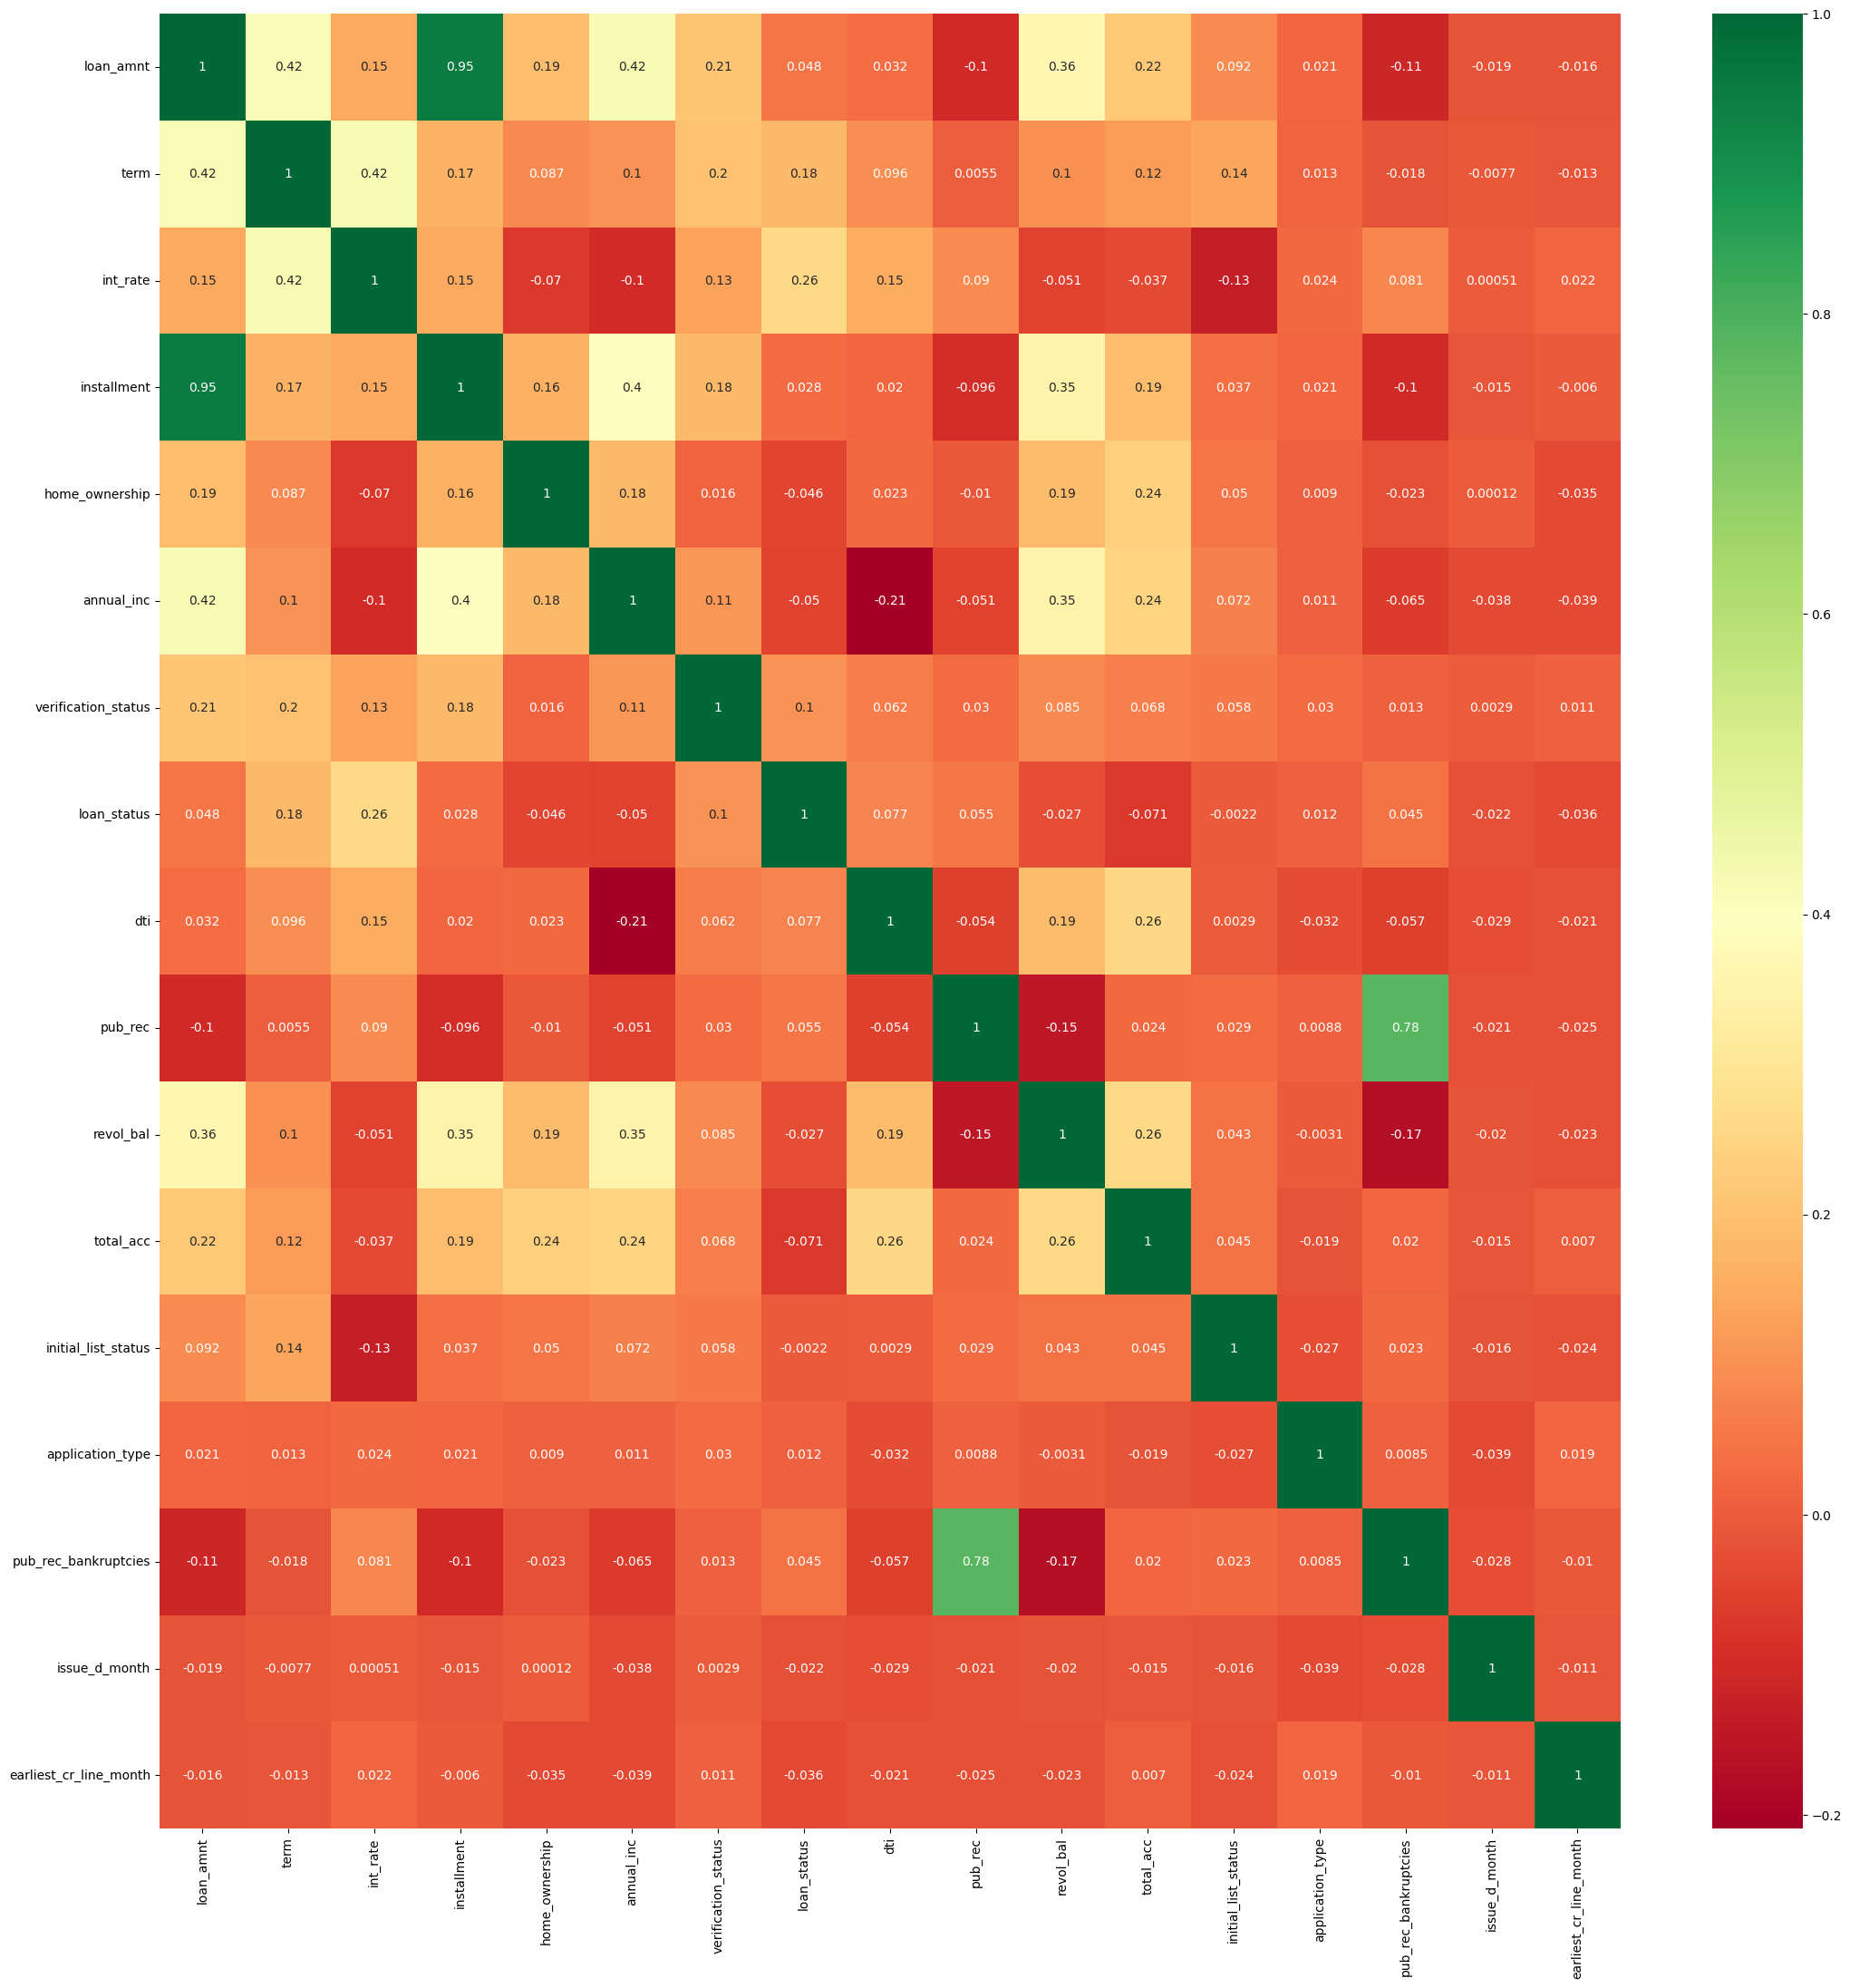

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(26,26))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [130]:
from sklearn import tree

Name Classes Should Be given in ascending order.
<a>https://datascience.stackexchange.com/questions/20415/what-should-be-the-order-of-class-names-in-sklearn-tree-export-function-beginne</a>

In [131]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=1000)
tree.plot_tree(model, feature_names=X.columns,class_names={0:'WillPay',1:'WontPay'},filled=True)


[Text(0.49196024960691825, 0.9736842105263158, 'int_rate <= 16.265\ngini = 0.288\nsamples = 1123\nvalue = [927, 196]\nclass = WillPay'),
 Text(0.20281790487421383, 0.9210526315789473, 'annual_inc <= 36250.0\ngini = 0.207\nsamples = 829\nvalue = [732, 97]\nclass = WillPay'),
 Text(0.06367924528301887, 0.868421052631579, 'emp_length <= 8.5\ngini = 0.38\nsamples = 90\nvalue = [67, 23]\nclass = WillPay'),
 Text(0.029874213836477988, 0.8157894736842105, 'address <= 56.5\ngini = 0.299\nsamples = 71\nvalue = [58, 13]\nclass = WillPay'),
 Text(0.02358490566037736, 0.7631578947368421, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = WontPay'),
 Text(0.036163522012578615, 0.7631578947368421, 'int_rate <= 6.69\ngini = 0.268\nsamples = 69\nvalue = [58, 11]\nclass = WillPay'),
 Text(0.029874213836477988, 0.7105263157894737, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = WontPay'),
 Text(0.04245283018867924, 0.7105263157894737, 'emp_title <= 347.0\ngini = 0.233\nsamples = 67\nvalue = [58, 9]\ncl

In [132]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'address', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year'],
      dtype='object')

In [133]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'address', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year'],
      dtype='object')